# Anomaly Detection in TimeSeries - LSTM AutoEncoder

## Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

plt.style.use('seaborn-v0_8-dark')

## The data

> *"S&P 500,abreviação de Standard & Poor's 500, ou simplesmente S&P, trata-se de um índice composto por quinhentos ativos (ações) cotados nas bolsas de NYSE ou NASDAQ, qualificados devido ao seu tamanho de mercado, sua liquidez e sua representação de grupo industrial. É (S&P 500) um índice ponderado de valor de mercado (valor do ativo multiplicado pelo número de ações em circulação) com o peso de cada ativo no índice proporcional ao seu preço de mercado. S&P faz referência a Standard & Poor's, uma empresa de consultoria financeira."* - [Wikipedia](https://pt.wikipedia.org/wiki/S%26P_500)

In [50]:
df = pd.read_csv('../data/spx.csv', parse_dates=['date'], index_col='date')
display(df.head())
display(df.describe())

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97


,close
count,8192.000000
mean,1070.897411
std,616.714534
min,203.490000
25%,458.632500
50%,1106.435000
75%,1388.132500
max,2872.870000


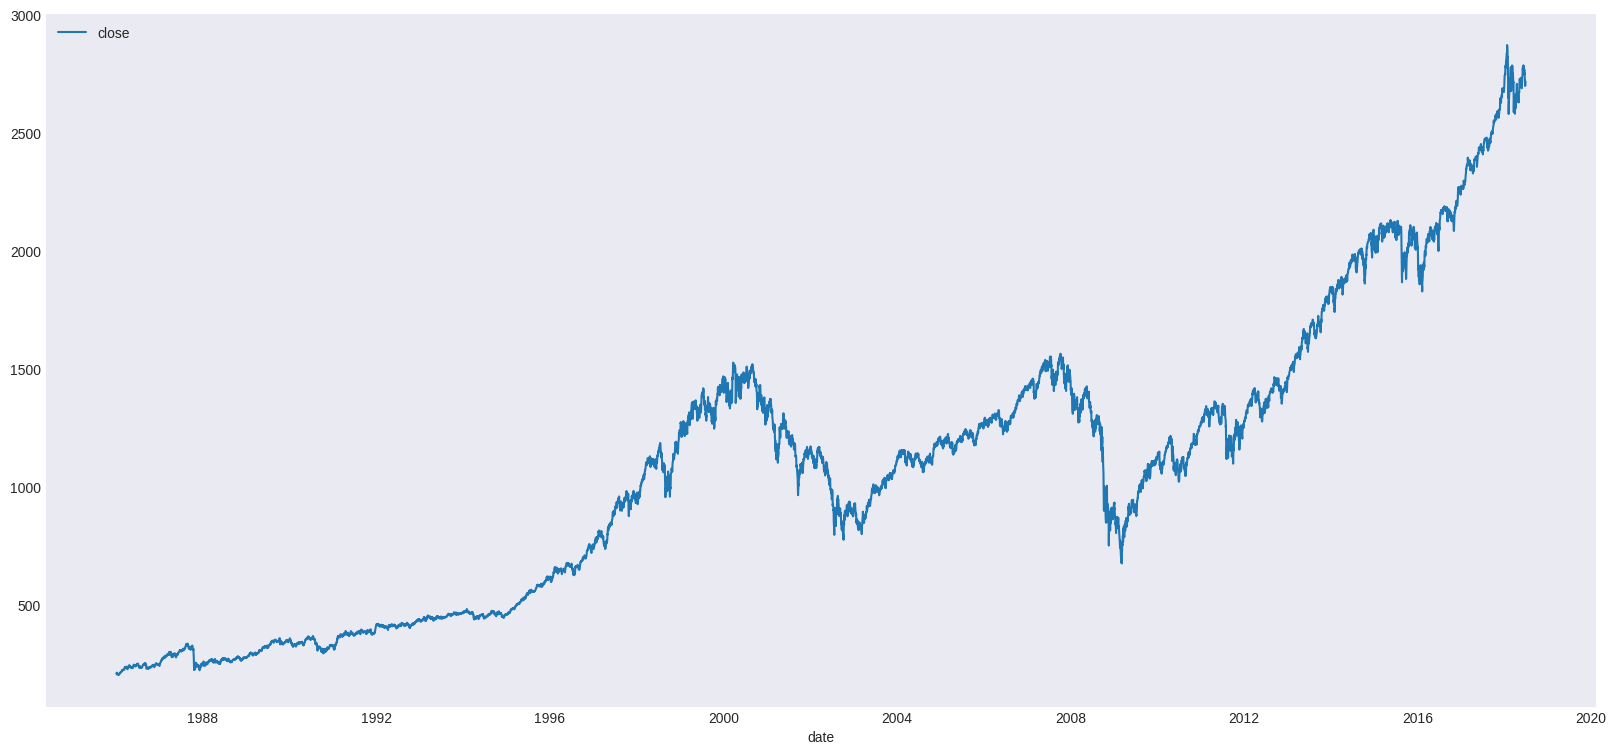

In [51]:
f, ax = plt.subplots(figsize=(20,9))
sns.lineplot(df,ax=ax);

## Preprocessing

In [71]:
train_percent = 0.9
test_percent = 1-train_percent

train_size = int(len(df)*train_percent)
test_size = len(df)-train_size

train, test = df.iloc[0:train_size].copy(), df.iloc[train_size:len(df)].copy()

print(train.shape, test.shape)

(7372, 1) (820, 1)


In [72]:
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [73]:
train['close'] = scaler.transform(train)
test['close'] = scaler.transform(test)

## Reference

https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/
https://neptune.ai/blog/anomaly-detection-in-time-series